In [2]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[:, [2,3]]
sc = StandardScaler()
sc.fit( X )
X_std = sc.transform( X )
svm = SVC( C = 1.0, kernel = "linear", random_state = 1)
svm.fit( X_std, y )

SVC(kernel='linear', random_state=1)

In [43]:
def plot_decision_regions( X, y, classifier, test_idx = None, res = 0.02 ):

    colors = ("red", "green", "blue", "yellow", "orange", "pink")
    markers = ( "o", "v", "^", "s", "<" )
    cmap = ListedColormap( colors[: len( np.unique(y))] )

    x1_min, x1_max =  X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max =  X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid( np.arange( x1_min, x1_max, res ),
                            np.arange( x2_min, x2_max, res ))

    prdct = np.array( [xx1.ravel(), xx2.ravel()] ).T
    lab = classifier.predict( prdct )
    lab = lab.reshape( xx1.shape )

    plt.contour( xx1, xx2, lab, alpha = 0.3, cmap = cmap )
    plt.xlim( xx1.min(), xx1.max() )
    plt.ylim( xx2.min(), xx2.max() )

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter( x = X[ y == cl, 0],
                     y = X[ y == cl, 1],
                     alpha = 0.8,
                     c = colors[idx],
                     marker = markers[idx],
                     label = f"Class : {cl}",
                     edgecolor = "black")
        
    if test_idx:
        X_test, Y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
        c='none', edgecolor='black', alpha=1.0,
        linewidth=1, marker='o',
        s=100, label='Test set')

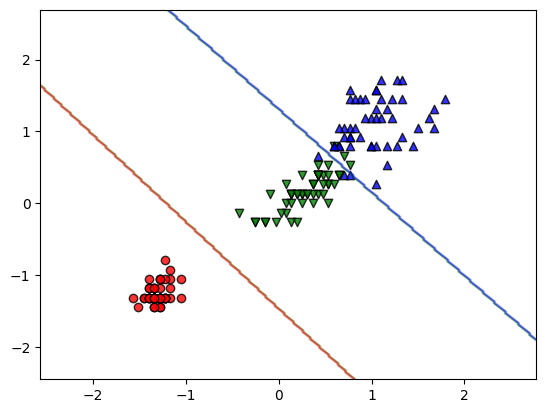

In [46]:
plot_decision_regions( X_std, y, svm, test_idx = None, res = 0.02 )